## Read output of experiments

In [24]:
%pip install pandas -q
%pip install matplotlib -q
%pip install seaborn -q

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [25]:
import pandas as pd

# Remember to set the output path from your experiments.
base_df = pd.read_csv("../eval_output/gemini/shared_docs/single_output.csv")
template_df = pd.read_csv("../eval_output/gemini/shared_docs/multi_output.csv")
recap_df = pd.read_csv("../eval_output/gemini/shared_docs/recap_output.csv")
rag_df = pd.read_csv("../eval_output/gemini/shared_docs/rag_multi_output.csv")
cat_df = pd.read_csv("../eval_output/gemini/shared_docs/cat_multi_ouput.csv")
rag_cat_df = pd.read_csv("../eval_output/gemini/shared_docs/cat_rag_multi_ouput.csv")
only_cat_df = pd.read_csv("../eval_output/gemini/shared_docs/only_cat_output.csv")

In [26]:
score_columns = ['FAC_DOC', 'INF_DOC', 'REL_DOC', 'OVR_DOC']

In [27]:
def separate_score_columns(df):
    df_split = pd.json_normalize(df['Score_Unknown Role'].apply(eval))  # Convert string dict to actual dict
    df = pd.concat([df.drop(columns=['Score_Unknown Role']), df_split], axis=1)
    return df

Create score columns based on string dictionary "{'FAC_DOC': 5, 'INF_DOC': 4, 'REL_DOC': 5, 'OVR_DOC': 5}"

In [28]:
base_df = separate_score_columns(base_df)
template_df = separate_score_columns(template_df)
recap_df = separate_score_columns(recap_df)
rag_df = separate_score_columns(rag_df)
cat_df = separate_score_columns(cat_df)
rag_cat_df = separate_score_columns(rag_cat_df)
only_cat_df = separate_score_columns(only_cat_df)


In [29]:
# We just load the meeting that has shared documents (number_token_shared_docs > 0)
path = "token_data.csv"
df = pd.read_csv(path)
df = df[df["num_tokens_shared_doc"] > 0]
df.head()

,file,num_tokens_transcripts,num_tokens_summary,num_tokens_shared_doc
0,ES2004d.json,11420,176,131699
1,ES2008b.json,10489,153,133296
3,IS1004d.json,8416,203,14540
4,IS1008a.json,5233,161,7285
6,IS1004a.json,2565,179,14540


In [30]:
short_threshold = df['num_tokens_shared_doc'].quantile(0.33)
long_threshold = df['num_tokens_shared_doc'].quantile(0.66)
print(f"Short: < {short_threshold}, Medium: ≥ {short_threshold} < {long_threshold}, Long: ≥ {long_threshold}")

Short: < 7285.0, Medium: ≥ 7285.0 < 117904.0, Long: ≥ 117904.0


Get average score on all shared_docs experiment with full samples

In [31]:
base_averages = base_df[score_columns].mean()
rag_averages = rag_df[score_columns].mean()
template_averages = template_df[score_columns].mean()
recap_averages = recap_df[score_columns].mean()
cat_averages = cat_df[score_columns].mean()
rag_cat_averages = rag_cat_df[score_columns].mean()
only_cat_averages = only_cat_df[score_columns].mean()

averages_df = recap_averages.to_frame(name='Recap_Average_Score')
averages_df['Base_Average_Score'] = base_averages
averages_df['Template_Average_Score'] = template_averages
averages_df['Cat_Average_Score'] = cat_averages
averages_df['RAG_Average_Score'] = rag_averages
averages_df['RAG_Cat_Average_Score'] = rag_cat_averages
averages_df['Only_Cat_Average_Score'] = only_cat_averages
averages_df

,Recap_Average_Score,Base_Average_Score,Template_Average_Score,Cat_Average_Score,RAG_Average_Score,RAG_Cat_Average_Score,Only_Cat_Average_Score
FAC_DOC,3.074627,3.000000,3.00000,3.000000,3.000000,3.000000,3.029851
INF_DOC,4.343284,4.119403,3.80597,3.865672,3.955224,3.895522,4.179104
REL_DOC,3.447761,3.492537,3.19403,3.253731,3.298507,3.253731,3.447761
OVR_DOC,3.955224,4.238806,3.61194,3.641791,3.731343,3.402985,4.149254


Get average score on all transcript experiment with full samples

In [32]:
import pandas as pd

base_df = pd.read_csv("../eval_output/gemini/transcript/single_output.csv")
template_df = pd.read_csv("../eval_output/gemini/transcript/multi_output.csv")
recap_df = pd.read_csv("../eval_output/gemini/transcript/recap_output.csv")
rag_df = pd.read_csv("../eval_output/gemini/transcript/rag_multi_output.csv")
cat_df = pd.read_csv("../eval_output/gemini/transcript/cat_multi_ouput.csv")
rag_cat_df = pd.read_csv("../eval_output/gemini/transcript/cat_rag_multi_ouput.csv")
only_cat_df = pd.read_csv("../eval_output/gemini/transcript/only_cat_output.csv")

score_columns = ['FAC', 'INF', 'REL', 'OVR']

base_df = separate_score_columns(base_df)
template_df = separate_score_columns(template_df)
recap_df = separate_score_columns(recap_df)
rag_df = separate_score_columns(rag_df)
cat_df = separate_score_columns(cat_df)
rag_cat_df = separate_score_columns(rag_cat_df)
only_cat_df = separate_score_columns(only_cat_df)

base_averages = base_df[score_columns].mean()
rag_averages = rag_df[score_columns].mean()
template_averages = template_df[score_columns].mean()
recap_averages = recap_df[score_columns].mean()
cat_averages = cat_df[score_columns].mean()
rag_cat_averages = rag_cat_df[score_columns].mean()
only_cat_averages = only_cat_df[score_columns].mean()

averages_df1 = recap_averages.to_frame(name='Recap_Average_Score')
averages_df1['Base_Average_Score'] = base_averages
averages_df1['Template_Average_Score'] = template_averages
averages_df1['Cat_Average_Score'] = cat_averages
averages_df1['RAG_Average_Score'] = rag_averages
averages_df1['RAG_Cat_Average_Score'] = rag_cat_averages
averages_df1['Only_Cat_Average_Score'] = only_cat_averages
averages_df1

,Recap_Average_Score,Base_Average_Score,Template_Average_Score,Cat_Average_Score,RAG_Average_Score,RAG_Cat_Average_Score,Only_Cat_Average_Score
FAC,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
INF,4.552239,3.716418,3.671642,4.014925,3.716418,3.611940,4.000000
REL,3.955224,3.343284,3.253731,3.611940,3.283582,3.104478,3.432836
OVR,4.164179,3.208955,3.328358,3.656716,3.298507,3.283582,3.447761


In [33]:
combined_avgs = pd.concat([averages_df1, averages_df], axis=0)
combined_avgs

,Recap_Average_Score,Base_Average_Score,Template_Average_Score,Cat_Average_Score,RAG_Average_Score,RAG_Cat_Average_Score,Only_Cat_Average_Score
FAC,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
INF,4.552239,3.716418,3.671642,4.014925,3.716418,3.611940,4.000000
REL,3.955224,3.343284,3.253731,3.611940,3.283582,3.104478,3.432836
OVR,4.164179,3.208955,3.328358,3.656716,3.298507,3.283582,3.447761
FAC_DOC,3.074627,3.000000,3.000000,3.000000,3.000000,3.000000,3.029851
INF_DOC,4.343284,4.119403,3.805970,3.865672,3.955224,3.895522,4.179104
REL_DOC,3.447761,3.492537,3.194030,3.253731,3.298507,3.253731,3.447761
OVR_DOC,3.955224,4.238806,3.611940,3.641791,3.731343,3.402985,4.149254


In [34]:
scaled_avgs = combined_avgs/5
scaled_avgs

,Recap_Average_Score,Base_Average_Score,Template_Average_Score,Cat_Average_Score,RAG_Average_Score,RAG_Cat_Average_Score,Only_Cat_Average_Score
FAC,0.800000,0.800000,0.800000,0.800000,0.800000,0.800000,0.800000
INF,0.910448,0.743284,0.734328,0.802985,0.743284,0.722388,0.800000
REL,0.791045,0.668657,0.650746,0.722388,0.656716,0.620896,0.686567
OVR,0.832836,0.641791,0.665672,0.731343,0.659701,0.656716,0.689552
FAC_DOC,0.614925,0.600000,0.600000,0.600000,0.600000,0.600000,0.605970
INF_DOC,0.868657,0.823881,0.761194,0.773134,0.791045,0.779104,0.835821
REL_DOC,0.689552,0.698507,0.638806,0.650746,0.659701,0.650746,0.689552
OVR_DOC,0.791045,0.847761,0.722388,0.728358,0.746269,0.680597,0.829851


In [35]:
round(scaled_avgs*100, 2)

,Recap_Average_Score,Base_Average_Score,Template_Average_Score,Cat_Average_Score,RAG_Average_Score,RAG_Cat_Average_Score,Only_Cat_Average_Score
FAC,80.00,80.00,80.00,80.00,80.00,80.00,80.00
INF,91.04,74.33,73.43,80.30,74.33,72.24,80.00
REL,79.10,66.87,65.07,72.24,65.67,62.09,68.66
OVR,83.28,64.18,66.57,73.13,65.97,65.67,68.96
FAC_DOC,61.49,60.00,60.00,60.00,60.00,60.00,60.60
INF_DOC,86.87,82.39,76.12,77.31,79.10,77.91,83.58
REL_DOC,68.96,69.85,63.88,65.07,65.97,65.07,68.96
OVR_DOC,79.10,84.78,72.24,72.84,74.63,68.06,82.99


In [36]:
# Compute averages for each metric pair
# F1 SCORE FORMULATION

avg_fac = (2*scaled_avgs.loc['FAC'] * scaled_avgs.loc['FAC_DOC']) / (scaled_avgs.loc['FAC'] + scaled_avgs.loc['FAC_DOC'])
avg_inf = (2*scaled_avgs.loc['INF'] * scaled_avgs.loc['INF_DOC']) / (scaled_avgs.loc['INF'] + scaled_avgs.loc['INF_DOC'])
avg_rel = (2*scaled_avgs.loc['REL'] * scaled_avgs.loc['REL_DOC']) / (scaled_avgs.loc['REL'] + scaled_avgs.loc['REL_DOC'])
avg_ovr = (2*scaled_avgs.loc['OVR'] * scaled_avgs.loc['OVR_DOC']) / (scaled_avgs.loc['OVR'] + scaled_avgs.loc['OVR_DOC'])

# Create the output DataFrame with averaged scores
avg_df = pd.DataFrame({
    'Recap': [avg_fac['Recap_Average_Score'], avg_inf['Recap_Average_Score'], avg_rel['Recap_Average_Score'], avg_ovr['Recap_Average_Score']],
    'Base': [avg_fac['Base_Average_Score'], avg_inf['Base_Average_Score'], avg_rel['Base_Average_Score'], avg_ovr['Base_Average_Score']],
    'Template': [avg_fac['Template_Average_Score'], avg_inf['Template_Average_Score'], avg_rel['Template_Average_Score'], avg_ovr['Template_Average_Score']],
    'Cat': [avg_fac['Only_Cat_Average_Score'], avg_inf['Only_Cat_Average_Score'], avg_rel['Only_Cat_Average_Score'], avg_ovr['Only_Cat_Average_Score']],
    'Template & Cat': [avg_fac['Cat_Average_Score'], avg_inf['Cat_Average_Score'], avg_rel['Cat_Average_Score'], avg_ovr['Cat_Average_Score']],
    'RAG': [avg_fac['RAG_Average_Score'], avg_inf['RAG_Average_Score'], avg_rel['RAG_Average_Score'], avg_ovr['RAG_Average_Score']],
    'RAG & Cat': [avg_fac['RAG_Cat_Average_Score'], avg_inf['RAG_Cat_Average_Score'], avg_rel['RAG_Cat_Average_Score'], avg_ovr['RAG_Cat_Average_Score']]
}, index=['AVG_FAC', 'AVG_INF', 'AVG_REL', 'AVG_OVR'])

# Rename columns for clarity
avg_df.columns = ['Recap', 'Base', 'Template', 'Cat', 'Template & Cat', 'RAG', 'RAG & Cat']

print("\nOutput DataFrame (Averaged Scores):")
avg_df = round(avg_df*100, 2)
avg_df.to_csv("out.csv")
avg_df


Output DataFrame (Averaged Scores):


,Recap,Base,Template,Cat,Template & Cat,RAG,RAG & Cat
AVG_FAC,69.54,68.57,68.57,68.96,68.57,68.57,68.57
AVG_INF,88.91,78.15,74.75,81.75,78.78,76.64,74.97
AVG_REL,73.68,68.33,64.47,68.81,68.47,65.82,63.55
AVG_OVR,81.14,73.05,69.29,75.32,72.98,70.03,66.84


In [37]:
# Compute averages for each metric pair
avg_fac = (scaled_avgs.loc['FAC'] + scaled_avgs.loc['FAC_DOC']) / 2
avg_inf = (scaled_avgs.loc['INF'] + scaled_avgs.loc['INF_DOC']) / 2
avg_rel = (scaled_avgs.loc['REL'] + scaled_avgs.loc['REL_DOC']) / 2
avg_ovr = (scaled_avgs.loc['OVR'] + scaled_avgs.loc['OVR_DOC']) / 2

# Create the output DataFrame with averaged scores
avg_df = pd.DataFrame({
    'Recap': [avg_fac['Recap_Average_Score'], avg_inf['Recap_Average_Score'], avg_rel['Recap_Average_Score'], avg_ovr['Recap_Average_Score']],
    'Base': [avg_fac['Base_Average_Score'], avg_inf['Base_Average_Score'], avg_rel['Base_Average_Score'], avg_ovr['Base_Average_Score']],
    'Template': [avg_fac['Template_Average_Score'], avg_inf['Template_Average_Score'], avg_rel['Template_Average_Score'], avg_ovr['Template_Average_Score']],
    'Cat': [avg_fac['Only_Cat_Average_Score'], avg_inf['Only_Cat_Average_Score'], avg_rel['Only_Cat_Average_Score'], avg_ovr['Only_Cat_Average_Score']],
    'Template & Cat': [avg_fac['Cat_Average_Score'], avg_inf['Cat_Average_Score'], avg_rel['Cat_Average_Score'], avg_ovr['Cat_Average_Score']],
    'RAG': [avg_fac['RAG_Average_Score'], avg_inf['RAG_Average_Score'], avg_rel['RAG_Average_Score'], avg_ovr['RAG_Average_Score']],
    'RAG & Cat': [avg_fac['RAG_Cat_Average_Score'], avg_inf['RAG_Cat_Average_Score'], avg_rel['RAG_Cat_Average_Score'], avg_ovr['RAG_Cat_Average_Score']]
}, index=['AVG_FAC', 'AVG_INF', 'AVG_REL', 'AVG_OVR'])

# Rename columns for clarity
avg_df.columns = ['Recap', 'Base', 'Template', 'Cat', 'Template & Cat', 'RAG', 'RAG & Cat']

print("\nOutput DataFrame (Averaged Scores):")
avg_df = round(avg_df*100, 2)
avg_df.to_csv("out.csv")
avg_df


Output DataFrame (Averaged Scores):


,Recap,Base,Template,Cat,Template & Cat,RAG,RAG & Cat
AVG_FAC,70.75,70.00,70.00,70.30,70.00,70.00,70.00
AVG_INF,88.96,78.36,74.78,81.79,78.81,76.72,75.07
AVG_REL,74.03,68.36,64.48,68.81,68.66,65.82,63.58
AVG_OVR,81.19,74.48,69.40,75.97,72.99,70.30,66.87


In [38]:
combined_avgs = round(combined_avgs*20, 2)
combined_avgs.to_csv("out.csv")

## Visualize on line chart

In [39]:
def get_average_score_by_df(input_df):
    items_to_filter = list(df[df["num_tokens_shared_doc"]<short_threshold]["file"])
    # Filter the DataFrame

    # Filter the DataFrame
    short_df = input_df[input_df['Item'].isin(items_to_filter)]
    short_df

    averages = short_df[score_columns].mean()

    # Display the averages
    avg_df = averages.to_frame(name='Short_Average_Score')

    avg_df.head()

    # Get items where num_tokens_shared_doc is in the medium range
    items_to_filter = list(df[(df["num_tokens_shared_doc"] >= short_threshold) & 
                            (df["num_tokens_shared_doc"] < long_threshold)]["file"])

    medium_df = input_df[input_df['Item'].isin(items_to_filter)]
    medium_df

    averages = medium_df[score_columns].mean()

    # Display the averages
    avg_df['Medium_Average_Score'] = averages

    avg_df.head()

    # Get items where num_tokens_shared_doc is in the medium range
    items_to_filter = list(df[df["num_tokens_shared_doc"] >= long_threshold]["file"])
    # Filter the DataFrame
    long_df = input_df[input_df['Item'].isin(items_to_filter)]
    long_df

    averages = long_df[score_columns].mean()

    # Display the averages
    avg_df['Long_Average_Score'] = averages
    avg_df.head()
    return avg_df

In [40]:
import pandas as pd

base_df = pd.read_csv("../eval_output/gemini/shared_docs/single_output.csv")
template_df = pd.read_csv("../eval_output/gemini/shared_docs/multi_output.csv")
recap_df = pd.read_csv("../eval_output/gemini/shared_docs/recap_output.csv")
rag_df = pd.read_csv("../eval_output/gemini/shared_docs/rag_multi_output.csv")
cat_df = pd.read_csv("../eval_output/gemini/shared_docs/cat_multi_ouput.csv")
rag_cat_df = pd.read_csv("../eval_output/gemini/shared_docs/cat_rag_multi_ouput.csv")
only_cat_df = pd.read_csv("../eval_output/gemini/shared_docs/only_cat_output.csv")

score_columns = ['FAC_DOC', 'INF_DOC', 'REL_DOC', 'OVR_DOC']

base_df = separate_score_columns(base_df)
template_df = separate_score_columns(template_df)
recap_df = separate_score_columns(recap_df)
rag_df = separate_score_columns(rag_df)
cat_df = separate_score_columns(cat_df)
rag_cat_df = separate_score_columns(rag_cat_df)
only_cat_df = separate_score_columns(only_cat_df)

base_avg_df = get_average_score_by_df(base_df)
template_avg_df = get_average_score_by_df(template_df)
recap_avg_df = get_average_score_by_df(recap_df)
rag_avg_df = get_average_score_by_df(rag_df)
cat_avg_df = get_average_score_by_df(cat_df)
rag_cat_avg_df = get_average_score_by_df(rag_cat_df)
only_cat_avg_df = get_average_score_by_df(only_cat_df)

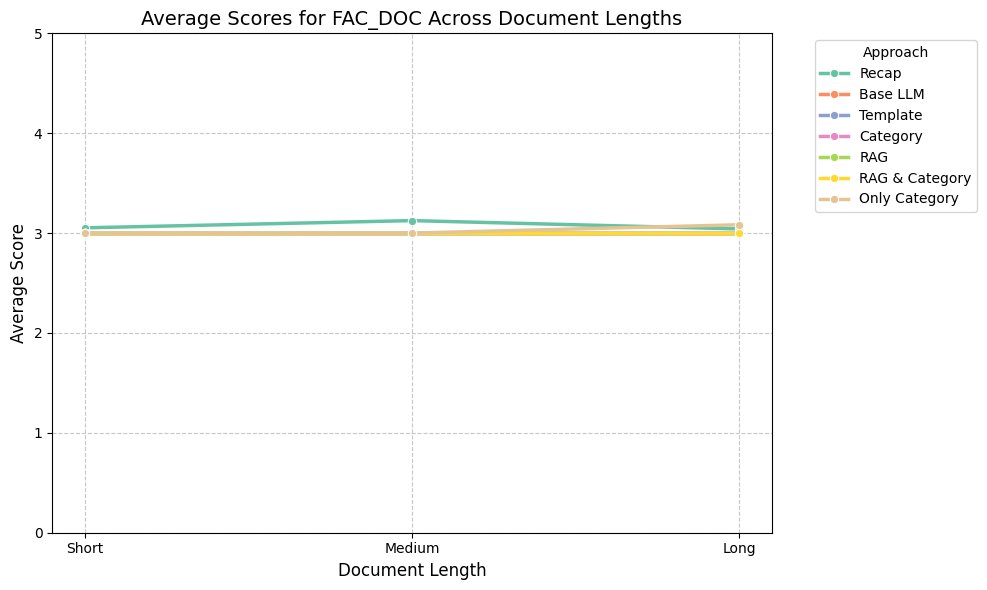

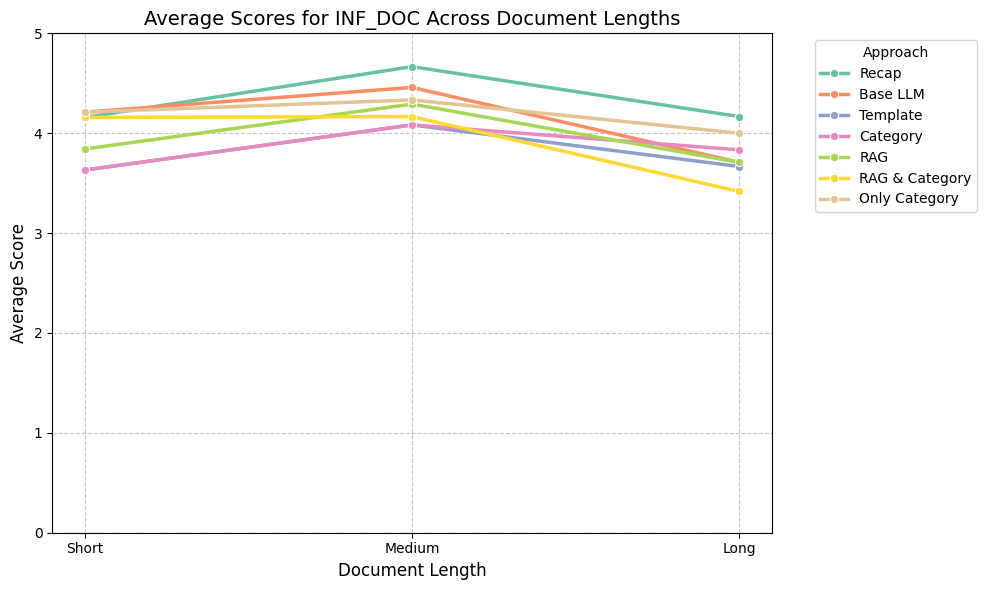

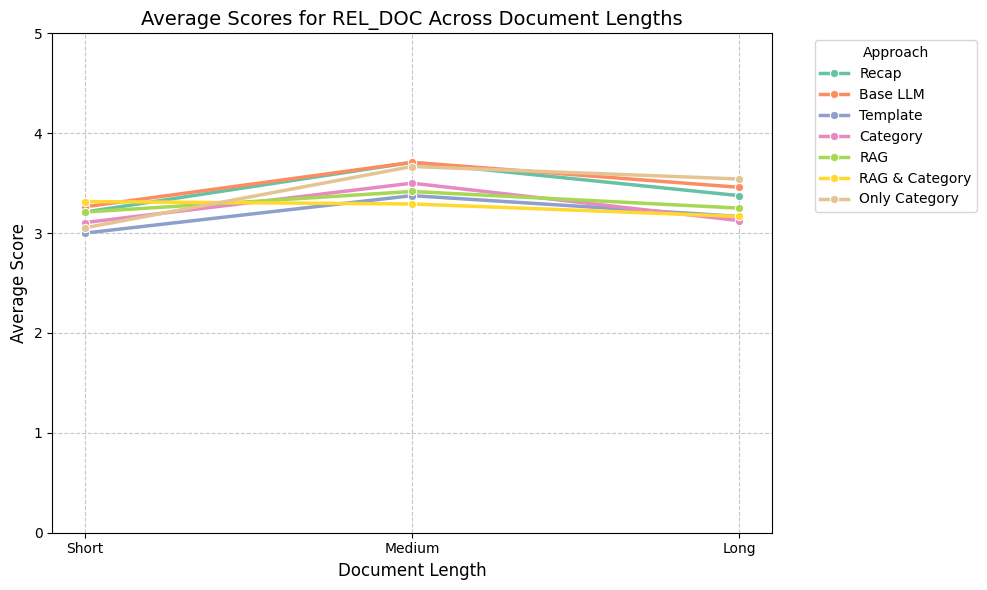

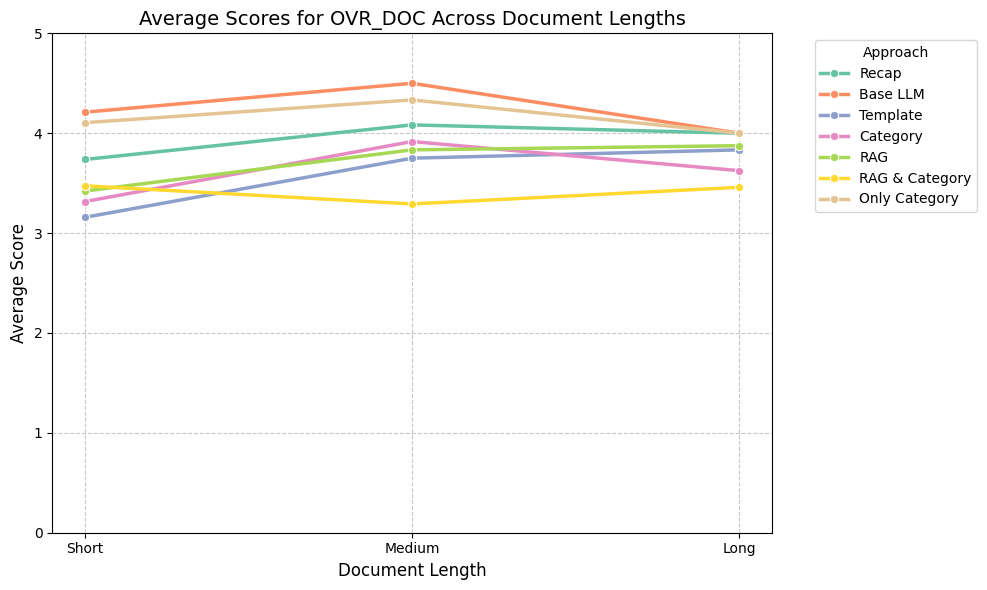

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming combined_df is created earlier with this approach
approach_dfs = {
    'recap_avg_df': 'Recap',
    'base_avg_df': 'Base LLM',
    'template_avg_df': 'Template',
    'cat_avg_df': 'Category',
    'rag_avg_df': 'RAG',
    'rag_cat_avg_df': 'RAG & Category',
    'only_cat_avg_df': 'Only Category'
}

# Debug: Check which DataFrames exist
available_dfs = {}
for df_name in approach_dfs.keys():
    if df_name in globals():
        available_dfs[df_name] = globals()[df_name]
        available_dfs[df_name]['Approach'] = approach_dfs[df_name]
    else:
        print(f"Warning: '{df_name}' not found in global namespace. Skipping...")

# Combine only available DataFrames
combined_df = pd.concat([df for df in available_dfs.values()], ignore_index=False)

# Reset index to make Criterion a column
combined_df = combined_df.reset_index().rename(columns={'index': 'Criterion'})

# Melt the DataFrame into long format
df_melted = combined_df.melt(id_vars=['Approach', 'Criterion'], 
                             value_vars=['Short_Average_Score', 'Medium_Average_Score', 'Long_Average_Score'],
                             var_name='Length', value_name='Score')

# Clean up Length names
df_melted['Length'] = df_melted['Length'].replace({
    'Short_Average_Score': 'Short',
    'Medium_Average_Score': 'Medium',
    'Long_Average_Score': 'Long'
})

# Ensure Length is categorical with correct order
df_melted['Length'] = pd.Categorical(df_melted['Length'], categories=['Short', 'Medium', 'Long'], ordered=True)

# List of criteria to plot separately
criteria = ['FAC_DOC', 'INF_DOC', 'REL_DOC', 'OVR_DOC']

# Create separate line plots for each criterion
for criterion in criteria:
    plt.figure(figsize=(10, 6))  # Set figure size for each plot
    sns.lineplot(data=df_melted[df_melted['Criterion'] == criterion], 
                 x='Length', y='Score', hue='Approach', 
                 marker='o', palette='Set2', linewidth=2.5)
    
    # Customize each plot
    plt.ylim(0, 5)  # Adjust y-axis to focus on score range (4-5.5)
    plt.title(f'Average Scores for {criterion} Across Document Lengths', fontsize=14)
    plt.xlabel('Document Length', fontsize=12)
    plt.ylabel('Average Score', fontsize=12)
    plt.legend(title='Approach', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()